In [1]:
import pandas as pd

In [14]:
database = pd.read_csv("sqlResult_1558435.csv", encoding='gb18030')

In [262]:
contents = database['content']

In [46]:
contents[1]

'骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考虑性能而去屏蔽掉小核心。相反，他们正联手微软，找到一种适合桌面平台的、兼顾性能和功耗的完美方案。\r\n报道称，微软已经拿到了一些新的源码，以便Windows 10更好地理解big.little架构。\r\n资料显示，骁龙835作为一款集成了CPU、GPU、基带、蓝牙/Wi-Fi的SoC，比传统的Wintel方案可以节省至少30%的PCB空间。\r\n按计划，今年Q4，华硕、惠普、联想将首发骁龙835 Win10电脑，预计均是二合一形态的产品。\r\n当然，高通骁龙只是个开始，未来也许还能见到三星Exynos、联发科、华为麒麟、小米澎湃等进入Windows 10桌面平台。\r\n'

In [47]:
import re

In [60]:
def cut(content):
    return ''.join(re.compile(r'[\w|\d]+').findall(content))

In [112]:
cut('骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考虑性能而去屏蔽掉小核心。相反，他们正联手微软，找到一种适合桌面平台的、兼顾性能和功耗的完美方案。\r\n报道称，微软已经拿到了一些新的源码，以便Windows 10更好地理解big.little架构。\r\n资料显示，骁龙835作为一款集成了CPU、GPU、基带、蓝牙/Wi-Fi的SoC，比传统的Wintel方案可以节省至少30%的PCB空间。\r\n按计划，今年Q4，华硕、惠普、联想将首发骁龙835 Win10电脑，预计均是二合一形态的产品。\r\n当然，高通骁龙只是个开始，未来也许还能见到三星Exynos、联发科、华为麒麟、小米澎湃等进入Windows 10桌面平台。\r\n')

'骁龙835作为唯一通过Windows10桌面平台认证的ARM处理器高通强调不会因为只考虑性能而去屏蔽掉小核心相反他们正联手微软找到一种适合桌面平台的兼顾性能和功耗的完美方案报道称微软已经拿到了一些新的源码以便Windows10更好地理解biglittle架构资料显示骁龙835作为一款集成了CPUGPU基带蓝牙WiFi的SoC比传统的Wintel方案可以节省至少30的PCB空间按计划今年Q4华硕惠普联想将首发骁龙835Win10电脑预计均是二合一形态的产品当然高通骁龙只是个开始未来也许还能见到三星Exynos联发科华为麒麟小米澎湃等进入Windows10桌面平台'

In [122]:
def get_tokens(contents):
    tokens = []
    for content in contents:
        tokens.append([word for word in jieba.cut(cut(str(content)))])
    return tokens

In [130]:
all_tokens = get_tokens(contents)

In [131]:
len(all_tokens)

89611

In [132]:
all_tokens[:2]

[['此外',
  '自',
  '本周',
  '6',
  '月',
  '12',
  '日起',
  '除',
  '小米',
  '手机',
  '6',
  '等',
  '15',
  '款',
  '机型',
  '外',
  '其余',
  '机型',
  '已',
  '暂停',
  '更新',
  '发布',
  '含',
  '开发',
  '版',
  '体验版',
  '内测',
  '稳定版',
  '暂不受',
  '影响',
  '以',
  '确保',
  '工程师',
  '可以',
  '集中',
  '全部',
  '精力',
  '进行',
  '系统优化',
  '工作',
  '有人',
  '猜测',
  '这',
  '也',
  '是',
  '将',
  '精力',
  '主要',
  '用到',
  'MIUI9',
  '的',
  '研发',
  '之中',
  'MIUI8',
  '去年',
  '5',
  '月',
  '发布',
  '距今已有',
  '一年',
  '有余',
  '也',
  '是',
  '时候',
  '更新换代',
  '了',
  '当然',
  '关于',
  'MIUI9',
  '的',
  '确切',
  '信息',
  '我们',
  '还是',
  '等待',
  '官方消息'],
 ['骁龙',
  '835',
  '作为',
  '唯一',
  '通过',
  'Windows10',
  '桌面',
  '平台',
  '认证',
  '的',
  'ARM',
  '处理器',
  '高通',
  '强调',
  '不会',
  '因为',
  '只',
  '考虑',
  '性能',
  '而',
  '去',
  '屏蔽掉',
  '小',
  '核心',
  '相反',
  '他们',
  '正',
  '联手',
  '微软',
  '找到',
  '一种',
  '适合',
  '桌面',
  '平台',
  '的',
  '兼顾',
  '性能',
  '和',
  '功耗',
  '的',
  '完美',
  '方案',
  '报道',
  '称',
  '微软',
  '已经',
  '拿到',
  '了',
  '一些',
 

In [133]:
from gensim.models import Word2Vec

In [134]:
sentence = [list(token) for token in all_tokens]

In [135]:
model = Word2Vec(all_tokens, workers=8)

In [138]:
model.most_similar("说")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('表示', 0.863144040107727),
 ('认为', 0.7961944937705994),
 ('指出', 0.7779885530471802),
 ('告诉', 0.7507252097129822),
 ('说完', 0.7255903482437134),
 ('看来', 0.7144650220870972),
 ('坦言', 0.7001689672470093),
 ('介绍', 0.6765984296798706),
 ('明说', 0.6720010042190552),
 ('称', 0.6367825865745544)]

In [139]:
from collections import defaultdict

## More Data, Better Results

In [147]:
def traverse(init_word, model, count):
    
    relate_word = [init_word]
    seen = defaultdict(int)
    
    while(len(seen) < count):
    
        node = relate_word.pop(0)
        
        relate_word += [word for word, _ in model.most_similar(node)]
        
        seen[node] += 1
        
    return sorted(seen.items(), key=lambda kv: kv[1], reverse=True)

In [149]:
traverse("说", model, 50)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.


[('说', 23),
 ('表示', 21),
 ('坦言', 20),
 ('认为', 19),
 ('指出', 15),
 ('告诉', 14),
 ('看来', 14),
 ('明说', 11),
 ('称', 11),
 ('透露', 10),
 ('说完', 9),
 ('介绍', 8),
 ('强调', 7),
 ('所说', 7),
 ('建议', 6),
 ('普遍认为', 5),
 ('提到', 4),
 ('说道', 3),
 ('眼中', 3),
 ('留意到', 2),
 ('见到', 2),
 ('问', 2),
 ('文说', 2),
 ('直言', 2),
 ('了解', 2),
 ('获悉', 2),
 ('还称', 2),
 ('中称', 2),
 ('称该', 2),
 ('声称', 2),
 ('中说', 2),
 ('地说', 1),
 ('称赞', 1),
 ('德说', 1),
 ('祁', 1),
 ('刘', 1),
 ('国利', 1),
 ('农艺师', 1),
 ('永康', 1),
 ('志军', 1),
 ('董', 1),
 ('重申', 1),
 ('特别强调', 1),
 ('敦促', 1),
 ('呼吁', 1),
 ('知情', 1),
 ('推测', 1),
 ('披露', 1),
 ('证实', 1),
 ('猜测', 1)]

## TFIDF Key words

In [162]:
def get_tf(word, document):
    return sum(1 for w in document if w == word)

In [163]:
all_tokens[0]

['此外',
 '自',
 '本周',
 '6',
 '月',
 '12',
 '日起',
 '除',
 '小米',
 '手机',
 '6',
 '等',
 '15',
 '款',
 '机型',
 '外',
 '其余',
 '机型',
 '已',
 '暂停',
 '更新',
 '发布',
 '含',
 '开发',
 '版',
 '体验版',
 '内测',
 '稳定版',
 '暂不受',
 '影响',
 '以',
 '确保',
 '工程师',
 '可以',
 '集中',
 '全部',
 '精力',
 '进行',
 '系统优化',
 '工作',
 '有人',
 '猜测',
 '这',
 '也',
 '是',
 '将',
 '精力',
 '主要',
 '用到',
 'MIUI9',
 '的',
 '研发',
 '之中',
 'MIUI8',
 '去年',
 '5',
 '月',
 '发布',
 '距今已有',
 '一年',
 '有余',
 '也',
 '是',
 '时候',
 '更新换代',
 '了',
 '当然',
 '关于',
 'MIUI9',
 '的',
 '确切',
 '信息',
 '我们',
 '还是',
 '等待',
 '官方消息']

In [166]:
get_tf("的",all_tokens[0])

2

In [167]:
import math

In [169]:
def get_idf(word, documents):
    count = sum(1 for doc in documents if word in doc)
    return math.log10(len(documents) / count)

In [172]:
get_idf("小米",all_tokens)

2.9655895895262288

In [174]:
get_idf("的",all_tokens)

0.10539364348661012

In [175]:
def get_tfidf(word, document, documents):
    return get_tf(word, document) * get_idf(word, documents)

In [177]:
get_tfidf("小米",all_tokens[0], all_tokens)

2.9655895895262288

In [179]:
get_tfidf("的",all_tokens[0], all_tokens)

0.21078728697322024

In [185]:
def get_key_words(document, all_documents):
    key_words = [(word, get_tfidf(word, document, all_documents))
                for word in document]
    return sorted(key_words, key=lambda x: x[1], reverse=True)

In [188]:
get_key_words(all_tokens[0], all_tokens)[:10]

[('MIUI9', 9.904722647584947),
 ('MIUI9', 9.904722647584947),
 ('机型', 5.922270496199958),
 ('机型', 5.922270496199958),
 ('精力', 5.177498687800658),
 ('精力', 5.177498687800658),
 ('体验版', 4.9523613237924735),
 ('稳定版', 4.9523613237924735),
 ('暂不受', 4.9523613237924735),
 ('系统优化', 4.9523613237924735)]

# Wordcloud

In [191]:
import wordcloud

In [193]:
wc = wordcloud.WordCloud("/Users/shlin/wspace/github/AI-For-NLP/lecture-6/online/SourceHanSerifSC-Regular.otf")

In [213]:
import matplotlib.pyplot as plt
%matplotlib inline

In [205]:
text = get_key_words(all_tokens[0], all_tokens)[:10]

In [206]:
text

[('MIUI9', 9.904722647584947),
 ('MIUI9', 9.904722647584947),
 ('机型', 5.922270496199958),
 ('机型', 5.922270496199958),
 ('精力', 5.177498687800658),
 ('精力', 5.177498687800658),
 ('体验版', 4.9523613237924735),
 ('稳定版', 4.9523613237924735),
 ('暂不受', 4.9523613237924735),
 ('系统优化', 4.9523613237924735)]

In [207]:
text_dict = {word:score for word, score in text}

In [209]:
text_dict

{'MIUI9': 9.904722647584947,
 '机型': 5.922270496199958,
 '精力': 5.177498687800658,
 '体验版': 4.9523613237924735,
 '稳定版': 4.9523613237924735,
 '暂不受': 4.9523613237924735,
 '系统优化': 4.9523613237924735}

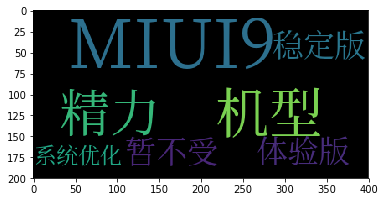

In [215]:
plt.imshow(wc.generate_from_frequencies(text_dict))

## TFIDF Vectorizezd

In [218]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [225]:
vectorizer = TfidfVectorizer(max_features=10000)

In [231]:
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
 ]

In [249]:
def get_corpus(contents):
    return [' '.join(jieba.cut(cut(str(content)))) for content in contents]

In [250]:
contents[:2]

0    此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...
1    骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...
Name: content, dtype: object

In [252]:
corpus = get_corpus(contents)

In [253]:
X = vectorizer.fit_transform(corpus)

In [255]:
X.shape

(89611, 10000)

In [267]:
vectorizer.vocabulary_

{'此外': 6209,
 '本周': 5900,
 '12': 32,
 '日起': 5633,
 '小米': 4001,
 '手机': 4893,
 '15': 46,
 '其余': 1844,
 '暂停': 5754,
 '更新': 5774,
 '发布': 2633,
 '开发': 4429,
 '影响': 4557,
 '确保': 7354,
 '工程师': 4163,
 '可以': 2731,
 '集中': 9612,
 '全部': 1748,
 '精力': 7689,
 '进行': 9112,
 '工作': 4145,
 '有人': 5820,
 '猜测': 6902,
 '主要': 937,
 '研发': 7335,
 '之中': 959,
 '去年': 2548,
 '一年': 329,
 '时候': 5650,
 '当然': 4534,
 '关于': 1822,
 '信息': 1560,
 '我们': 4826,
 '还是': 9058,
 '等待': 7626,
 '作为': 1456,
 '唯一': 2965,
 '通过': 9221,
 '平台': 4288,
 '认证': 8560,
 '强调': 4510,
 '不会': 574,
 '因为': 3043,
 '考虑': 8007,
 '性能': 4668,
 '核心': 6079,
 '相反': 7230,
 '他们': 1265,
 '联手': 8045,
 '微软': 4604,
 '找到': 4966,
 '一种': 374,
 '适合': 9164,
 '兼顾': 1865,
 '完美': 3803,
 '方案': 5561,
 '报道': 5039,
 '已经': 4188,
 '拿到': 5115,
 '一些': 281,
 '以便': 1280,
 '更好': 5771,
 '理解': 6989,
 '架构': 6035,
 '资料': 8794,
 '显示': 5723,
 '一款': 361,
 '集成': 9618,
 '传统': 1374,
 '节省': 8212,
 '至少': 8147,
 '30': 102,
 '空间': 7515,
 '按计划': 5144,
 '今年': 1238,
 '联想': 8044,
 '首发': 9811,
 '电脑': 70

In [269]:
X[0].toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [271]:
from pandas import np

In [272]:
np.where(X[0].toarray())

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([  32,   46,  329,  937,  959, 1560, 1748, 1822, 1844, 2548, 2633,
        2731, 4001, 4145, 4163, 4429, 4534, 4557, 4826, 4893, 5633, 5650,
        5754, 5774, 5820, 5900, 6209, 6902, 7335, 7354, 7626, 7689, 9058,
        9112, 9612]))

In [274]:
from scipy.spatial.distance import cosine

In [276]:
def distance(v1, v2):
    return cosine(v1, v2)

In [278]:
distance(X[0].toarray(), X[1].toarray())

0.9329498987349365

## Build Search Engine